
#### **Linear Regression**


## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]** An epoch is when all the dataset has been completely passed, while an iteration is each time the parameters are updated. In SGD, if there are n samples in total, one epoch takes n iterations. In mini-batch gradient descent, the full dataset is divided into k small batches, one epoch takes k iterations.

In [ ]:
#Part1
#1.Print the dataframe
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [ ]:
target_data=df['Goal']
target_data=target_data.values
del df['Goal']
feature_data=df.values

In [ ]:
type(target_data)

numpy.ndarray

In [ ]:
#2.prepare the dataset
from sklearn.model_selection import train_test_split
#Split the dataset into training, validation, and test set
val_size=0.15/0.85
trainsize=0.70/0.85
X_train, X_test, y_train, y_test= train_test_split(feature_data, target_data, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=val_size, random_state=1)
y_train=np.array(y_train)
y_val=np.array(y_val)
y_test=np.array(y_test)
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import math 

#Standardize the data
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_std=scaler.transform(X_train)
X_val_std=scaler.transform(X_val)
X_test_std=scaler.transform(X_test)

#Insert the first column of all  1 s in the training, validation, and test set.
one_train=np.ones(np.shape(X_train_std[:,0])).reshape(-1,1)
one_val=np.ones(np.shape(X_val_std[:,0])).reshape(-1,1)
one_test=np.ones(np.shape(X_test_std[:,0])).reshape(-1,1)
X_train_g=np.hstack((one_train, X_train_std))
X_val_g=np.hstack((one_val, X_val_std))
X_test_g=np.hstack((one_test, X_test_std))

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
#Part2
#Implement the direct solution of the linear regression problem on the training set
from scipy import linalg
W = np.dot(linalg.inv(np.dot(X_train_g.T, X_train_g)), np.dot(X_train_g.T, y_train)) # Train the model using training set: finding parameters

#Report the root-mean-square error (RMSE) for both the training and validation sets.
from sklearn.metrics import mean_squared_error
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

y_pred_train = np.dot(X_train_g, W)
y_pred_val = np.dot(X_val_g, W)
rmse_train=rmse(y_pred_train,y_train)
rmse_val=rmse(y_pred_val,y_val)

print("The root-mean-square error (RMSE) for the training set is: ",rmse_train)
print("The root-mean-square error (RMSE) for the validation set is: ",rmse_val)

The root-mean-square error (RMSE) for the training set is:  0.00017772429953295758
The root-mean-square error (RMSE) for the validation set is:  0.00017289549968124482


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]** According to the RMSE of the training and validation dataset, underfitting happens with only a few epochs used to train the parameters, as the number of epoches increases, the RMSE of both training and validation set decrease.

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [ ]:
import time
start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##
alpha=0.01
threshold=1.001*rmse_val

weight_num=np.shape(X_train_g)[1]

#Initial weights
W=np.random.uniform(low=0, high=0.001, size=weight_num).reshape(1,-1)
rmse_train_array=[]
rmse_val_array=[]

#Full-batch gradient descent
for epoch in range (0, 30000):
  y_pred_train= np.dot(X_train_g,W.T)
  y_pred_val= np.dot(X_val_g,W.T)
  rmse_GD_val=rmse(y_pred_val,y_val)
  rmse_GD_train=rmse(y_pred_train,y_train)
  if rmse_GD_val<=threshold:
    print("The gradient descent algorithm converges at epoch : ",epoch)
    break
  rmse_val_array.append(rmse_GD_val)
  rmse_train_array.append(rmse_GD_train)
  gradient = (1/len(y_train)* np.dot(X_train_g.T, y_pred_train-y_train.reshape(-1,1))).reshape(1,-1)
  W = W - alpha * gradient ### weight update
print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

The gradient descent algorithm converges at epoch :  21387
--- Total Training Time: 24.053657293319702 (s) ---


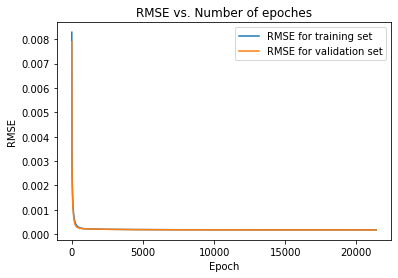

In [ ]:
#Plot the training RMSE and the validation RMSE vs. epoch on the same figure
import matplotlib.pyplot as plt

plt.plot(rmse_train_array,label="RMSE for training set")
plt.plot(rmse_val_array,label="RMSE for validation set")
plt.title("RMSE vs. Number of epoches")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**From the RMSE vs. epoches plot, generally the RMSE decreased as epoches increase for each number of batch sizes. From the RMSE vs. time plot, in most cases, the elapsed time for each epoch increased as number of epoch increases, and the RMSE decreased with similar trend in RMSE vs. epoches plot, at the first few episodes, the weights are updated more quickly compared to later epoches. The total elapsed time vs. batch sizes plot shows that generally the total training time increases as batch size increases for the converging batch sizes.

In [ ]:
#Part 4 Mini-Batch gradient descent
def mini_batch_GD(x_train,y_train,x_val,y_val,batch_size,lr,thr):
  
  #Number of batches
  Num_batch=len(y_train)//batch_size
  #Weight dimension
  weight_num=np.shape(x_train)[1] 

  #Initilize weights
  W=np.random.uniform(low=0, high=0.001, size=weight_num).reshape(1,-1)
  rmse_train_array=[]
  rmse_val_array=[]
  elapsed_time_array=[]

  for epoch in range(0,20000):
    start_time = time.time() ## Records current time
    y_pred_train= np.dot(x_train,W.T)
    y_pred_val= np.dot(x_val,W.T)
    rmse_MB_val=rmse(y_pred_val,y_val)
    rmse_MB_train=rmse(y_pred_train,y_train)
    rmse_val_array.append(rmse_MB_val)
    rmse_train_array.append(rmse_MB_train)

    mini_batches=[]
    data=np.hstack((x_train,y_train.reshape(-1,1)))
    np.random.permutation(data)#after each epoch, shuffle the entire training set
    i=0
    for i in range(Num_batch):#Generate mini batches
      mini_batch=data[i * batch_size:(i + 1)*batch_size, :]
      X_mini = mini_batch[:, :-1]
      Y_mini = mini_batch[:, -1].reshape((-1, 1))
      mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    for mini_batch in mini_batches:
      x_mini, y_mini = mini_batch
      y_pred_mini= np.dot(x_mini,W.T)
      gradient = (1/len(y_mini)* np.dot(x_mini.T, y_pred_mini-y_mini.reshape(-1,1))).reshape(1,-1)
      W = W - lr * gradient ### weight update

    #End of each epoch
    #check the RMSE of the validation set at each epoch, and if it's getting larger, stop the training for that case
    y_pred_val= np.dot(x_val,W.T)
    rmse_MB_val_new=rmse(y_pred_val,y_val)
    elapsed_time=time.time() - start_time
    elapsed_time_array.append(elapsed_time)
    if rmse_MB_val_new <= thr:
      print("The mini batch gradient descent algorithm converges with batch size {} at epoch {} : ".format(batch_size,epoch))
      break

    if rmse_MB_val_new > rmse_MB_val:
      print("RMSE of validation set increases, mini-batch gradient descent does not converge with batch size: ",batch_size)
      break
    

  return W,rmse_train_array,rmse_val_array,elapsed_time_array

In [ ]:
#Try mini batches of different sizes
alpha=0.01

batch_sizes=[2,4,8,16,32,64,128,256,512,1024,2048]
for batch_size in batch_sizes:

  W,rmse_train_array,rmse_val_array,elapsed_time_array=mini_batch_GD(X_train_g,y_train,X_val_g,y_val,batch_size,alpha,threshold)

RMSE of validation set increases, mini-batch gradient descent does not converge with batch size:  2
RMSE of validation set increases, mini-batch gradient descent does not converge with batch size:  4
RMSE of validation set increases, mini-batch gradient descent does not converge with batch size:  8
RMSE of validation set increases, mini-batch gradient descent does not converge with batch size:  16
RMSE of validation set increases, mini-batch gradient descent does not converge with batch size:  32
RMSE of validation set increases, mini-batch gradient descent does not converge with batch size:  64
The mini batch gradient descent algorithm converges with batch size 128 at epoch 187 : 
The mini batch gradient descent algorithm converges with batch size 256 at epoch 594 : 
The mini batch gradient descent algorithm converges with batch size 512 at epoch 1253 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 513 : 
The mini batch gradient descent algorithm c

The mini batch gradient descent algorithm converges with batch size 128 at epoch 187 : 
The mini batch gradient descent algorithm converges with batch size 256 at epoch 665 : 
The mini batch gradient descent algorithm converges with batch size 512 at epoch 412 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 2393 : 
The mini batch gradient descent algorithm converges with batch size 2048 at epoch 6062 : 


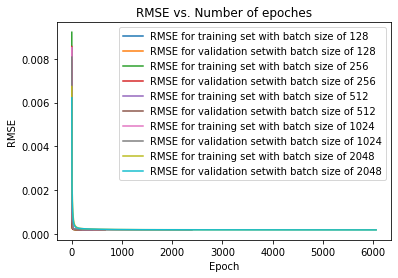

In [ ]:
#Plot training and validation RMSE vs. epoch for all the converging batch sizes
batch_sizes=[128,256,512,1024,2048]
for batch_size in batch_sizes:

  W,rmse_train_array,rmse_val_array,elapsed_time_array=mini_batch_GD(X_train_g,y_train,X_val_g,y_val,batch_size,alpha,threshold)
  plt.plot(rmse_train_array,label="RMSE for training set with batch size of {}".format(batch_size))
  plt.plot(rmse_val_array,label="RMSE for validation setwith batch size of {}".format(batch_size))

plt.title("RMSE vs. Number of epoches")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

The mini batch gradient descent algorithm converges with batch size 128 at epoch 139 : 
The mini batch gradient descent algorithm converges with batch size 256 at epoch 358 : 
The mini batch gradient descent algorithm converges with batch size 512 at epoch 663 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 935 : 
The mini batch gradient descent algorithm converges with batch size 2048 at epoch 1397 : 


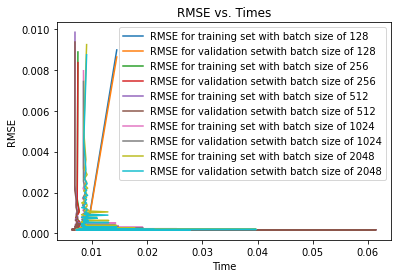

In [ ]:
#Plot training and validation RMSE vs. time for all the converging batch sizes in a figure
batch_sizes=[128,256,512,1024,2048]
for batch_size in batch_sizes:

  W,rmse_train_array,rmse_val_array,elapsed_time_array=mini_batch_GD(X_train_g,y_train,X_val_g,y_val,batch_size,alpha,threshold)
  plt.plot(elapsed_time_array,rmse_train_array,label="RMSE for training set with batch size of {}".format(batch_size))
  plt.plot(elapsed_time_array,rmse_val_array,label="RMSE for validation setwith batch size of {}".format(batch_size))

plt.title("RMSE vs. Times")
plt.legend()
plt.xlabel("Time")
plt.ylabel("RMSE")
plt.show()

The mini batch gradient descent algorithm converges with batch size 128 at epoch 242 : 
The mini batch gradient descent algorithm converges with batch size 256 at epoch 249 : 
The mini batch gradient descent algorithm converges with batch size 512 at epoch 391 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 286 : 
The mini batch gradient descent algorithm converges with batch size 2048 at epoch 3342 : 


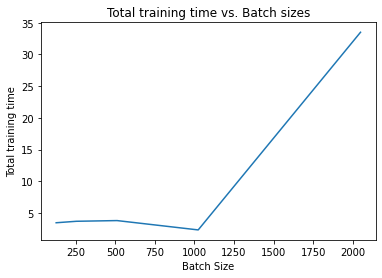

In [ ]:
#Plot Total training time (y-axis) vs. Batch size (x-axis)
batch_sizes=[128,256,512,1024,2048]
total_time_array=[]
for batch_size in batch_sizes:

  W,rmse_train_array,rmse_val_array,elapsed_time_array=mini_batch_GD(X_train_g,y_train,X_val_g,y_val,batch_size,alpha,threshold)
  total_time=sum(elapsed_time_array)
  total_time_array.append(total_time)
plt.plot(batch_sizes,total_time_array,label="RMSE for training set with batch size of {}".format(batch_size))

plt.title("Total training time vs. Batch sizes")
plt.xlabel("Batch Size")
plt.ylabel("Total training time")
plt.show()

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batchsize that are not converging with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batchsize. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**
The picked 3 batchsizes that are not converging with alpha=0.01 are: 16, 32, 64
Each of these 3 bacthsizes are re-evaluated with alpha=0.001 and they all converged.
Batch size=16: converges at smaller learning rate alpha=0.001, RMSE of training and validation set decrease with the similar trend as other converging batch sizes.  
Batch size=32: converges at smaller learning rate alpha=0.001, RMSE of training and validation set decrease with the similar trend as other converging batch sizes.
Batch size=64: converges at smaller learning rate alpha=0.001, RMSE of training and validation set decrease with the similar trend as other converging batch sizes.    
2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**The best batchsize based on Part 4's fastest convergence time is 1024. From the RMSE vs. epoch plot, it can be found that with lower learning rate, it requires more epoches to converge. From the RMSE vs. time plot, it was found that the RMSE decreases as time increases, showing that the elapsed time for each epoch increased as number of epoch increases, and it takes more time to converge as learning rate decreases.

The mini batch gradient descent algorithm converges with batch size 16 at epoch 474 : 


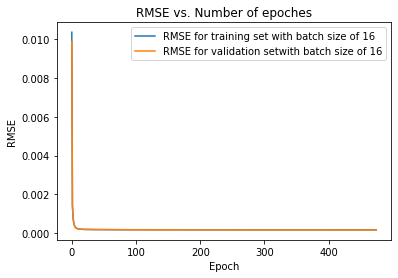

In [ ]:
#Part5 
#1. Pick 3 batch size that are not converging with learning rate=0.01: batch size-16,32,64
batch_size=16
alpha=0.001
W,rmse_train_array,rmse_val_array,elapsed_time_array=mini_batch_GD(X_train_g,y_train,X_val_g,y_val,batch_size,alpha,threshold)
plt.plot(rmse_train_array,label="RMSE for training set with batch size of {}".format(batch_size))
plt.plot(rmse_val_array,label="RMSE for validation setwith batch size of {}".format(batch_size))
plt.title("RMSE vs. Number of epoches")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

The mini batch gradient descent algorithm converges with batch size 32 at epoch 638 : 


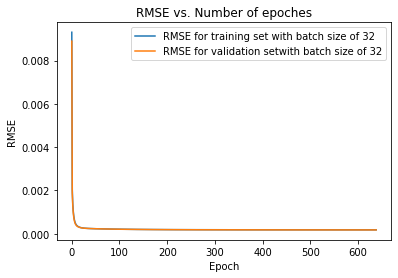

In [ ]:
batch_size=32
alpha=0.001
W,rmse_train_array,rmse_val_array,elapsed_time_array=mini_batch_GD(X_train_g,y_train,X_val_g,y_val,batch_size,alpha,threshold)
plt.plot(rmse_train_array,label="RMSE for training set with batch size of {}".format(batch_size))
plt.plot(rmse_val_array,label="RMSE for validation setwith batch size of {}".format(batch_size))
plt.title("RMSE vs. Number of epoches")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

The mini batch gradient descent algorithm converges with batch size 64 at epoch 1311 : 


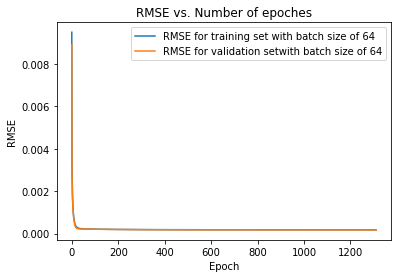

In [ ]:
batch_size=64
alpha=0.001
W,rmse_train_array,rmse_val_array,elapsed_time_array=mini_batch_GD(X_train_g,y_train,X_val_g,y_val,batch_size,alpha,threshold)
plt.plot(rmse_train_array,label="RMSE for training set with batch size of {}".format(batch_size))
plt.plot(rmse_val_array,label="RMSE for validation setwith batch size of {}".format(batch_size))
plt.title("RMSE vs. Number of epoches")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

The mini batch gradient descent algorithm converges with batch size 1024 at epoch 7505 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 9158 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 1301 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 1918 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 1387 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 1633 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 2911 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 2421 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 1546 : 


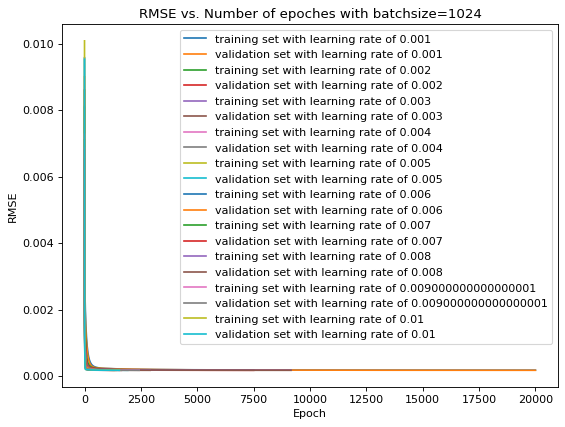

In [ ]:
#Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate
#The best batchsize based on Part 4 is 1024
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
batch_size=1024
#Different learning rate from 0.001 to 0.01
#Plot the training and validation RMSE vs. epoch (x-axis) for all the learning rates that you tried in a figure.
alpha_array=np.linspace(0.001,0.01,10)
for alpha in alpha_array:
  W,rmse_train_array,rmse_val_array,elapsed_time_array=mini_batch_GD(X_train_g,y_train,X_val_g,y_val,batch_size,alpha,threshold)
  plt.plot(rmse_train_array,label="training set with learning rate of {}".format(alpha))
  plt.plot(rmse_val_array,label="validation set with learning rate of {}".format(alpha))
plt.title("RMSE vs. Number of epoches with batchsize=1024")
plt.legend(loc='upper right')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

The mini batch gradient descent algorithm converges with batch size 1024 at epoch 15061 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 11860 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 6281 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 5913 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 1393 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 3520 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 1180 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 1181 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 1662 : 
The mini batch gradient descent algorithm converges with batch size 1024 at epoch 1142 : 


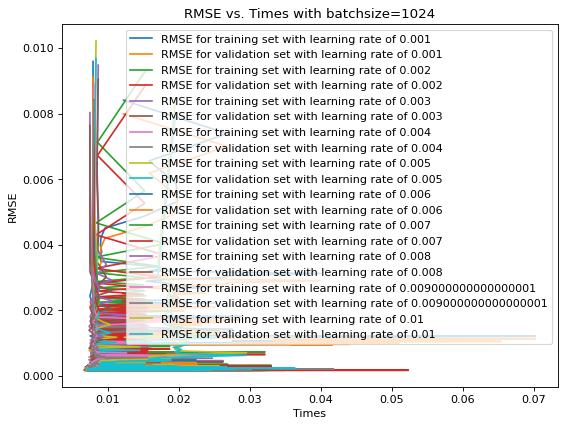

In [ ]:
#Plot the training and validation RMSE vs. time (x-axis) for all the learning rates
#The best batchsize based on Part 4 is 1024

figure(figsize=(8, 6), dpi=80)
batch_size=1024
#Different learning rate from 0.001 to 0.01
#Plot the training and validation RMSE vs. epoch (x-axis) for all the learning rates that you tried in a figure.
alpha_array=np.linspace(0.001,0.01,10)
for alpha in alpha_array:
  W,rmse_train_array,rmse_val_array,elapsed_time_array=mini_batch_GD(X_train_g,y_train,X_val_g,y_val,batch_size,alpha,threshold)
  plt.plot(elapsed_time_array,rmse_train_array,label="RMSE for training set with learning rate of {}".format(alpha))
  plt.plot(elapsed_time_array,rmse_val_array,label="RMSE for validation set with learning rate of {}".format(alpha))
plt.title("RMSE vs. Times with batchsize=1024")
plt.legend()
plt.xlabel("Times")
plt.ylabel("RMSE")
plt.show()

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** Based on the findings from previous parts, I selected mini-batch gradient descent algorithm with batchsize of 1024 and learning rate of 0.01, as the full batch gradient descent takes more time to converge, and the batchsize of 1024 has the leaset overall elapsed converging time among the batchsizes evaluated.

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** The rmse of the test dataset is 0.00016953577215341844, well below our threshold value, which means that our model has good performance estimating the parameters.

In [ ]:
#Part6
batch_size=1024
alpha=0.01
W,rmse_train_array,rmse_val_array,elapsed_time_array=mini_batch_GD(X_train_g,y_train,X_val_g,y_val,batch_size,alpha,threshold)
#W is the converged optimal weights from the model selected
y_pred_test=np.dot(X_test_g,W.T)
rmse_test=rmse(y_pred_test,y_test)
print(rmse_test)

The mini batch gradient descent algorithm converges with batch size 1024 at epoch 1240 : 
0.00016953577215341844


## Part 7 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 6. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/5dxrAjOj to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-2021/project4_git-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-2021/project4_git-*********
```


 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project4_git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add W22_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you had any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.** 

**Private Repository Link :**https://github.com/APS-1070-2021/project4_git-YusongYao **[3 marks]**